## Intro to Regression

[intro desmos](https://www.desmos.com/calculator/ywloazwete)

Goals:
- use statsmodels to build a regression model
- use summary statistics to evaluate a model
- differentiate between corr, cov, and R squared

In [2]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
plt.style.use('seaborn')

`.cov` , `.corr`

[link to dataset](https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv)

In [6]:
class_data = pd.read_csv("https://raw.githubusercontent.com/chasinginfinity/ml-from-scratch/master/03%20Linear%20Regression%20in%202%20minutes/data.csv", header = None)

In [8]:
class_data.columns = ["X", "Y"]

In [11]:
class_data.describe().T

,count,mean,std,min,25%,50%,75%,max
X,100.0,48.958341,9.746379,25.128485,41.526164,49.634970,56.762631,70.346076
Y,100.0,72.735051,16.658187,31.707006,60.788586,72.179542,83.215080,118.591217


In [13]:
class_data.corr()

,X,Y
X,1.000000,0.773728
Y,0.773728,1.000000


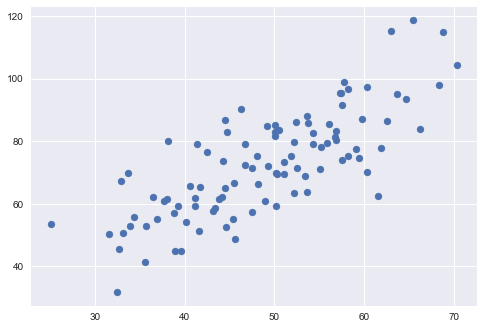

In [14]:
plt.scatter(class_data.X, class_data.Y)

In [19]:
f = "Y~X"

In [20]:
model = ols(formula=f, data=class_data).fit()

In [22]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     146.2
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.86e-21
Time:                        14:47:06   Log-Likelihood:                -377.03
No. Observations:                 100   AIC:                             758.1
Df Residuals:                      98   BIC:                             763.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.9910      5.459      1.464      0.146      -2.842      18.824
X              1.3224      0.109     12.090      0.000       1.105       1.539
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.808
Skew:                           0.148   Prob(JB):                        0.668
Kurtosis:                       2.674   Cond. No.                         257.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# For Y=mx+b, b = intercept coefficient, x = x coefficient.
# According to f-statistic probability, it is significant
# R-squared shows relationship, but it isn't the highest

## Beginner
### Problem One: Chopsticks
#### Is chopstick length correlated with effectiveness?

In [23]:
chopsticks = pd.read_csv("http://blog.yhat.com/static/misc/data/chopstick-effectiveness.csv")

In [27]:
chopsticks = chopsticks.drop(columns = ['Individual'])

In [29]:
chopsticks.columns = ["food_pinching_effeciency", "chopstick_length"]

In [30]:
chopsticks.describe().T

,count,mean,std,min,25%,50%,75%,max
food_pinching_effeciency,186.0,25.005591,4.039693,14.47,22.54,24.905,27.9325,36.15
chopstick_length,186.0,255.000000,51.373040,180.00,210.00,255.000,300.0000,330.00


In [31]:
chopsticks.cov()

,food_pinching_effeciency,chopstick_length
food_pinching_effeciency,16.319119,-20.670811
chopstick_length,-20.670811,2639.189189


In [32]:
chopsticks.corr()

,food_pinching_effeciency,chopstick_length
food_pinching_effeciency,1.000000,-0.099603
chopstick_length,-0.099603,1.000000


In [33]:
f = "food_pinching_effeciency~chopstick_length"
model = ols(formula=f, data=chopsticks).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     food_pinching_effeciency   R-squared:                       0.010
Model:                                  OLS   Adj. R-squared:                  0.005
Method:                       Least Squares   F-statistic:                     1.844
Date:                      Mon, 26 Aug 2019   Prob (F-statistic):              0.176
Time:                              15:10:22   Log-Likelihood:                -522.18
No. Observations:                       186   AIC:                             1048.
Df Residuals:                           184   BIC:                             1055.
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           27.0028      1.500     17.998      0.000      24.043      29.963
chopstick_length    -0.0078      0.006     -1.358      0.176      -0.019       0.004
==============================================================================
Omnibus:                        1.652   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.438   Jarque-Bera (JB):                1.737
Skew:                          -0.207   Prob(JB):                        0.420
Kurtosis:                       2.771   Cond. No.                     1.32e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

[Link to chopsticks study](https://www.ncbi.nlm.nih.gov/pubmed/15676839)

## Intermediate:
### Problem Three: Street price of weed
[reference](http://blog.yhat.com/posts/7-funny-datasets.html)

Has the price of weed been trending downward or upward over time? 
- overall?
- different in certain states?
- different qualities?

In [34]:
weed = pd.read_csv("http://blog.yhat.com/static/misc/data/marijuana-street-price-clean.csv")

In [46]:
weed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22899 entries, 0 to 22898
Data columns (total 8 columns):
State       22899 non-null object
HighQ       22899 non-null float64
HighQN      22899 non-null int64
MedQ        22899 non-null float64
MedQN       22899 non-null int64
LowQ        12342 non-null float64
LowQN       22899 non-null int64
datetime    22899 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 1.4+ MB


In [38]:
weed['datetime'] = weed.date.map(lambda x: pd.to_datetime(x[:10], format = '%Y/%m/%d'))

In [41]:
weed = weed.drop(columns=['date'])

In [50]:
total = weed

In [51]:
LowQ_med = total.LowQ.median()
total['LowQ'] = total.LowQ.fillna(LowQ_med)

In [54]:
plt.scatterplot()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,datetime
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


## Advanced
### DC housing
### Doing repeat OLS, which variables are related to housing price?

In [ ]:
housing = pd.read_csv("https://drive.google.com/uc?export=download&id=1DsbpIf4_9CAKNd-B9gaML1WKOJcMne71")

In [ ]:
housing.head()